# results Visualization

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [ ]:
pd.read_csv('results/Malanville/CO2_detailed_output.csv')

,timestamp,project_name,run_id,duration,emissions,emissions_rate,cpu_power,gpu_power,ram_power,cpu_energy,...,cpu_count,cpu_model,gpu_count,gpu_model,longitude,latitude,ram_total_size,tracking_mode,on_cloud,pue
0,2025-06-17T21:26:39,Linear Regression,304a9e35-3dbd-48f9-baf0-183bee794695,0.922250,2.082081e-08,2.257610e-08,22.5,0.0,11.698365,0.000006,...,8,Intel(R) Core(TM) i7-6820HQ CPU @ 2.70GHz,NaN,NaN,-72.6789,46.3695,31.195641,machine,N,1.0
1,2025-06-17T21:26:45,Ridge,231cf423-625d-4768-acc9-ed59ca3a6d3c,0.990770,2.236625e-08,2.257462e-08,22.5,0.0,11.698365,0.000006,...,8,Intel(R) Core(TM) i7-6820HQ CPU @ 2.70GHz,NaN,NaN,-72.6789,46.3695,31.195641,machine,N,1.0
2,2025-06-17T21:26:56,RandomForest,da1b3d84-9933-4e09-9f43-382b5bfadbfd,5.011653,1.131703e-07,2.258142e-08,22.5,0.0,11.698365,0.000031,...,8,Intel(R) Core(TM) i7-6820HQ CPU @ 2.70GHz,NaN,NaN,-72.6789,46.3695,31.195641,machine,N,1.0
3,2025-06-17T21:27:08,Xgboost,2f8e7cef-694b-42a7-b63b-4f8b5dbc4e56,6.845926,1.545904e-07,2.258137e-08,22.5,0.0,11.698365,0.000043,...,8,Intel(R) Core(TM) i7-6820HQ CPU @ 2.70GHz,NaN,NaN,-72.6789,46.3695,31.195641,machine,N,1.0
4,2025-06-17T21:27:16,Lightgbm,b42178b6-a0c9-4521-ba29-740389b9f2b6,1.966798,4.440743e-08,2.257855e-08,22.5,0.0,11.698365,0.000012,...,8,Intel(R) Core(TM) i7-6820HQ CPU @ 2.70GHz,NaN,NaN,-72.6789,46.3695,31.195641,machine,N,1.0
5,2025-06-17T21:27:24,SVR,ff363c52-a126-4b3f-82a8-3f90facf0846,2.514324,5.677080e-08,2.257895e-08,22.5,0.0,11.698365,0.000016,...,8,Intel(R) Core(TM) i7-6820HQ CPU @ 2.70GHz,NaN,NaN,-72.6789,46.3695,31.195641,machine,N,1.0
6,2025-06-17T21:34:31,Conv1D-model,98b2cbac-e26f-4241-8c14-ef5810d52206,420.973110,9.506304e-06,2.258174e-08,22.5,0.0,11.698365,0.002631,...,8,Intel(R) Core(TM) i7-6820HQ CPU @ 2.70GHz,NaN,NaN,-72.6789,46.3695,31.195641,machine,N,1.0
7,2025-06-17T21:48:07,LSTM-model,833105a7-e8bd-4600-b59f-8e5843d6c7f6,810.650942,1.830581e-05,2.258162e-08,22.5,0.0,11.698365,0.005066,...,8,Intel(R) Core(TM) i7-6820HQ CPU @ 2.70GHz,NaN,NaN,-72.6789,46.3695,31.195641,machine,N,1.0
8,2025-06-17T22:03:11,GRU-model,ef9e19f6-9566-4d60-bc85-2e8ab0df2748,898.112779,2.028085e-05,2.258163e-08,22.5,0.0,11.698365,0.005613,...,8,Intel(R) Core(TM) i7-6820HQ CPU @ 2.70GHz,NaN,NaN,-72.6789,46.3695,31.195641,machine,N,1.0
9,2025-06-17T22:12:21,Conv1d-LSTM,ee5e0936-f7f8-4175-a384-142c109548dc,543.814546,1.227979e-05,2.258084e-08,22.5,0.0,11.698365,0.003399,...,8,Intel(R) Core(TM) i7-6820HQ CPU @ 2.70GHz,NaN,NaN,-72.6789,46.3695,31.195641,machine,N,1.0


In [ ]:
sns.set_theme(style="white", context="talk", palette="muted")
plt.rcParams.update({
    'font.family': 'serif',
    'font.size': 13,
    'axes.titlesize': 13,
    'axes.labelsize': 13,
    'legend.fontsize': 11,
    'xtick.labelsize': 10,
    'ytick.labelsize': 10,
    'figure.dpi': 100
})

In [ ]:
def plot_loss(history, size=(9, 6), train_label='Training loss', val_label='Validation loss', title='Training Validation loss'):
    plt.figure(figsize=size)
    plt.plot(history['loss'], '-', linewidth=2, label=train_label)
    plt.plot(history['val_loss'], '-', linewidth=2, label=val_label)
    plt.title(title)
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(loc='upper right')
    #plt.show()

In [ ]:
def plot_metric(history, size=(9, 6), train_label='Training root mean squared error', val_label='Validation root mean squared error', title='Root mean squared error'):
    plt.figure(figsize=size)
    plt.plot(history['root_mean_squared_error'], '-', linewidth=2, label=train_label)
    plt.plot(history['val_root_mean_squared_error'], '-', linewidth=2, label=val_label)
    plt.title(title)
    plt.ylabel('RMSE')
    plt.xlabel('Epoch')
    plt.legend(loc='upper right')
    #plt.show()

## Malanville

### conv1D

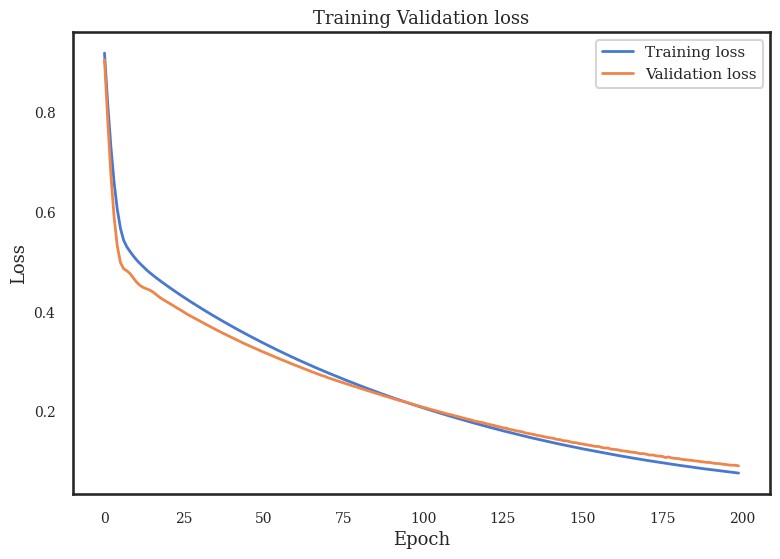

In [ ]:
model_outputs = pd.read_csv('results/Malanville/conv1D_train_output.csv')
plot_loss(model_outputs[:200])
plt.savefig(os.path.join('results/Malanville/', 'conv1D_train_val_loss.png'))
plt.show()

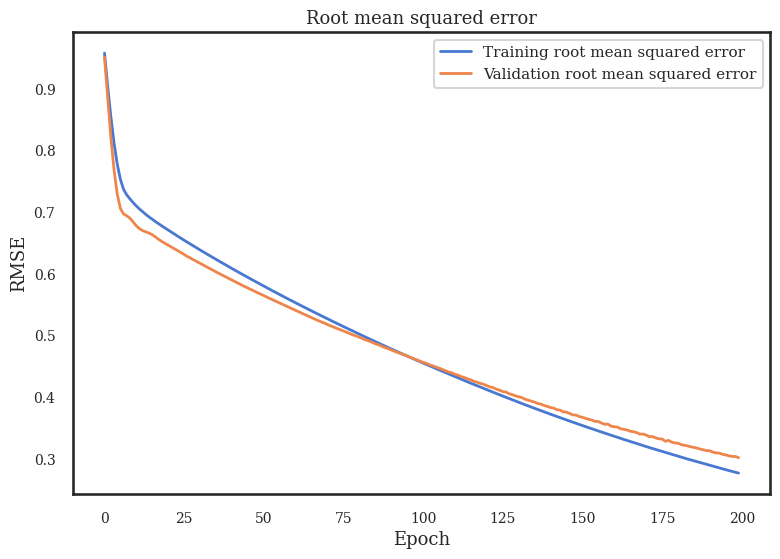

In [ ]:
plot_metric(model_outputs[:200])
plt.savefig(os.path.join('results/Malanville/', 'conv1D_train_val_rmse.png'))
plt.show()

In [ ]:
# 200 epochs to be taken into consideration

### LSTM

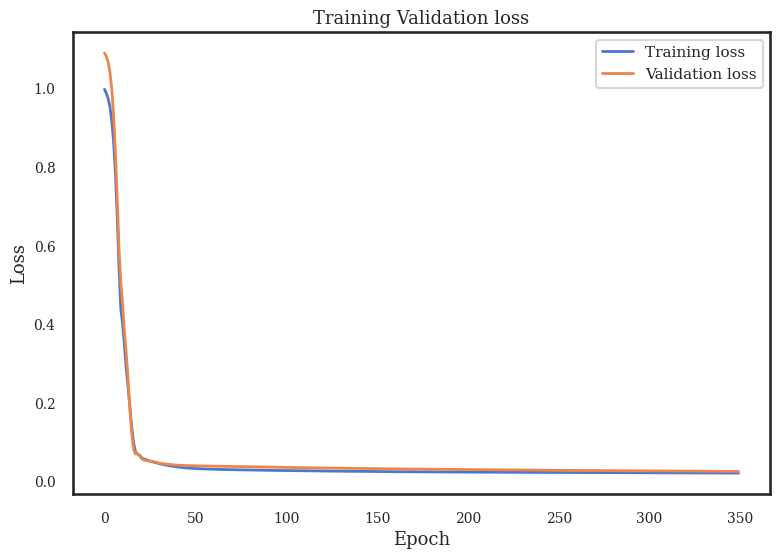

In [ ]:
EPOCHS = 350
lstm_model_outputs = pd.read_csv('results/Malanville/LSTM_train_output.csv')
plot_loss(lstm_model_outputs[:EPOCHS])
plt.savefig(os.path.join('results/Malanville/', 'LSTM_train_val_loss.png'))
plt.show()

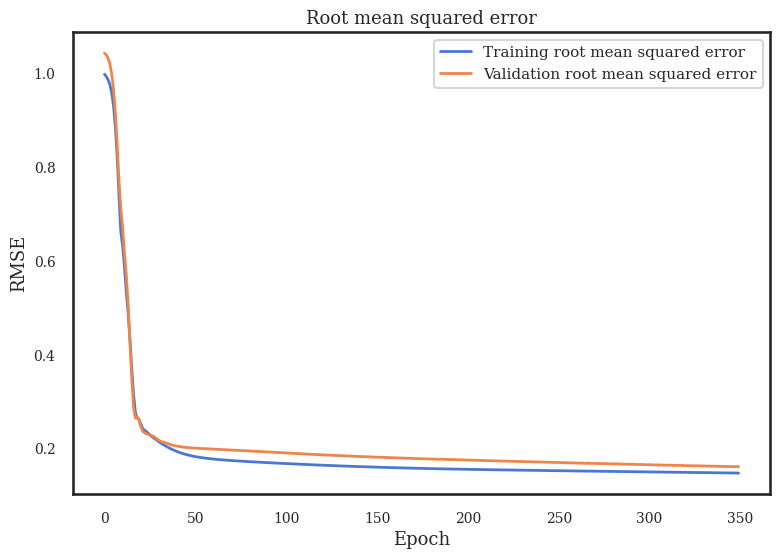

In [ ]:
plot_metric(lstm_model_outputs[:EPOCHS])
plt.savefig(os.path.join('results/Malanville/', 'LSTM_train_val_rmse.png'))
plt.show()

In [ ]:
# 350 epochs to be taken into consideration

### GRU

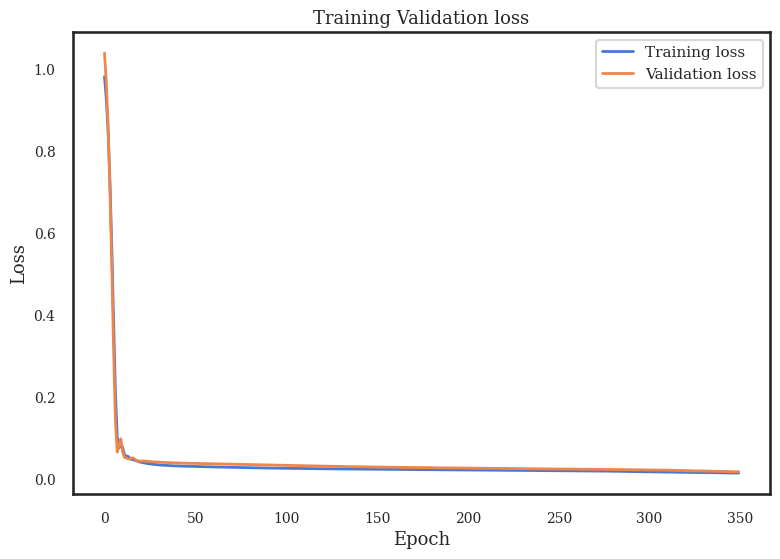

In [ ]:
model_outputs = pd.read_csv('results/Malanville/GRU_train_output.csv')
plot_loss(model_outputs[:EPOCHS])
plt.savefig(os.path.join('results/Malanville/', 'GRU_train_val_loss.png'))
plt.show()

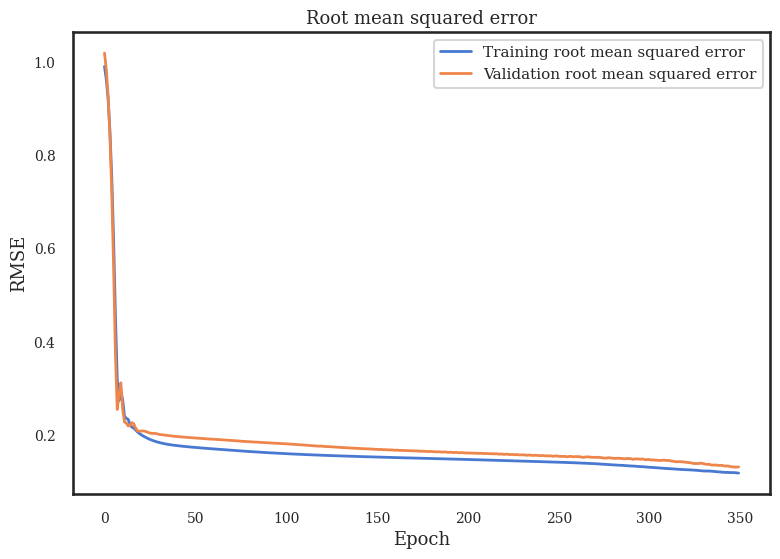

In [ ]:
plot_metric(model_outputs[:EPOCHS])
plt.savefig(os.path.join('results/Malanville/', 'GRU_train_val_rmse.png'))
plt.show()

In [ ]:
# 350 epochs to be taken into consideration

### conv1D-LSTM

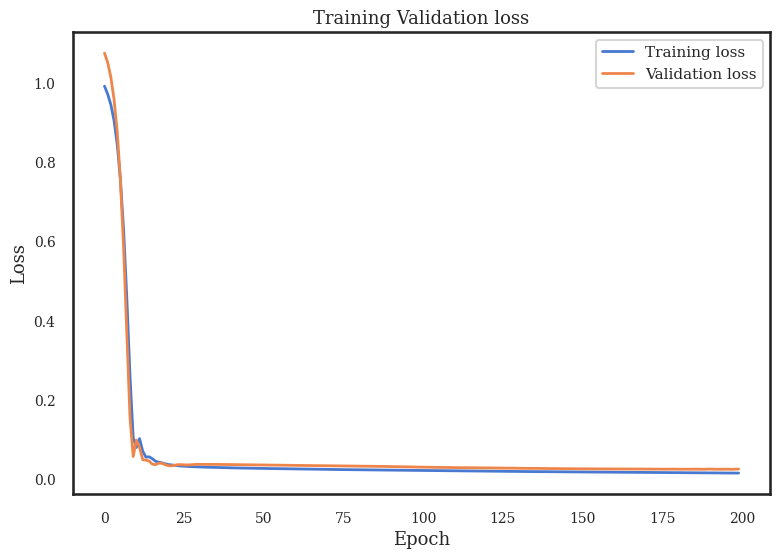

In [ ]:
EPOCHS = 200
model_outputs = pd.read_csv('results/Malanville/conv1D_lstm_train_output.csv')
plot_loss(model_outputs[:EPOCHS])
plt.savefig(os.path.join('results/Malanville/', 'conv1D_LSTM_train_val_loss.png'))
plt.show()

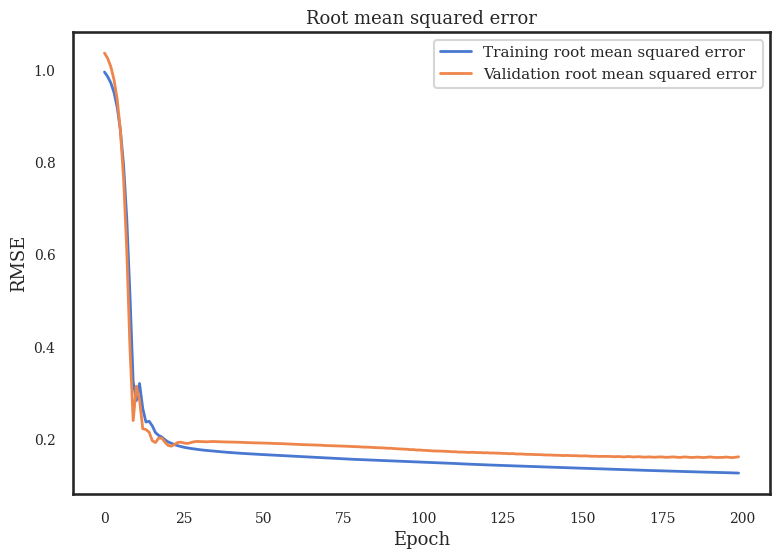

In [ ]:
plot_metric(model_outputs[:EPOCHS])
plt.savefig(os.path.join('results/Malanville/', 'conv1D_LSTM_train_val_rmse.png'))
plt.show()

In [ ]:
# 200 epochs to be taken into consideration

## Karimama

### conv1D

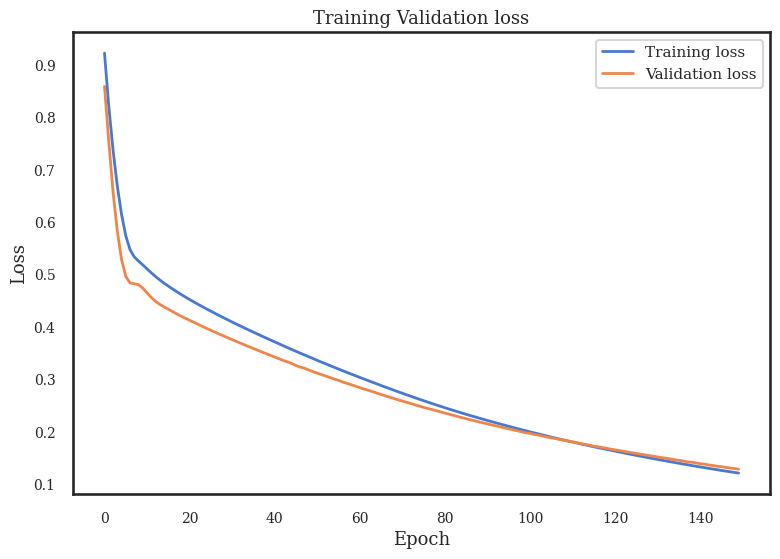

In [ ]:
EPOCHS = 150
plot_loss(pd.read_csv('results/Karimama/conv1D_train_output.csv')[:EPOCHS])
plt.savefig(os.path.join('results/Karimama/', 'conv1D_train_val_loss.png'))
plt.show()

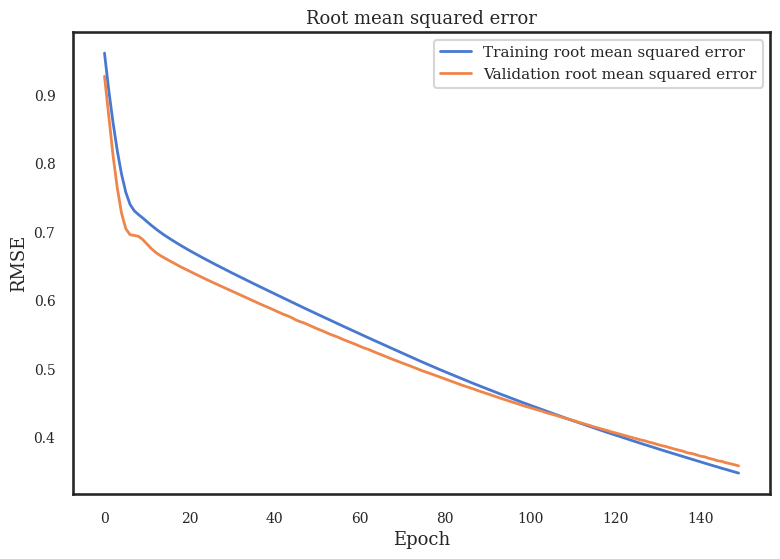

In [ ]:
plot_metric(pd.read_csv('results/Karimama/conv1D_train_output.csv')[:EPOCHS])
plt.savefig(os.path.join('results/Karimama/', 'conv1D_train_val_rmse.png'))
plt.show()

In [ ]:
# 150 epochs to be taken into consideration

### LSTM

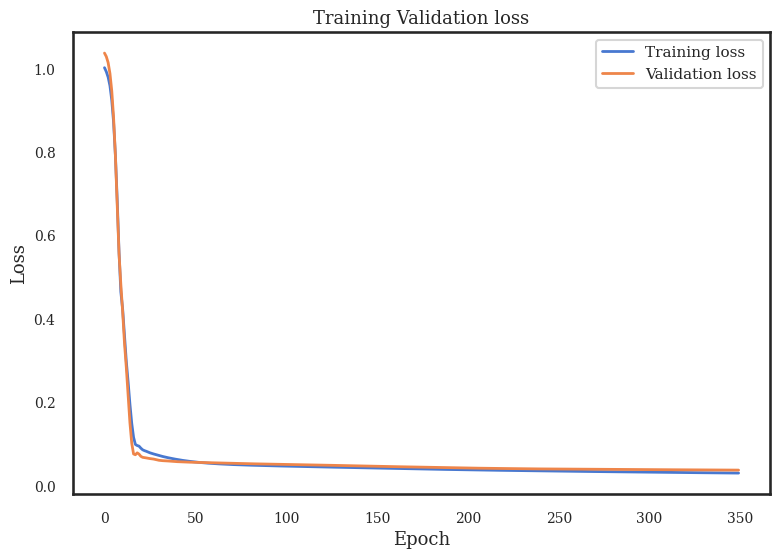

In [ ]:
EPOCHS = 350
plot_loss(pd.read_csv('results/Karimama/LSTM_train_output.csv')[:EPOCHS])
plt.savefig(os.path.join('results/Karimama/', 'LSTM_train_val_loss.png'))
plt.show()

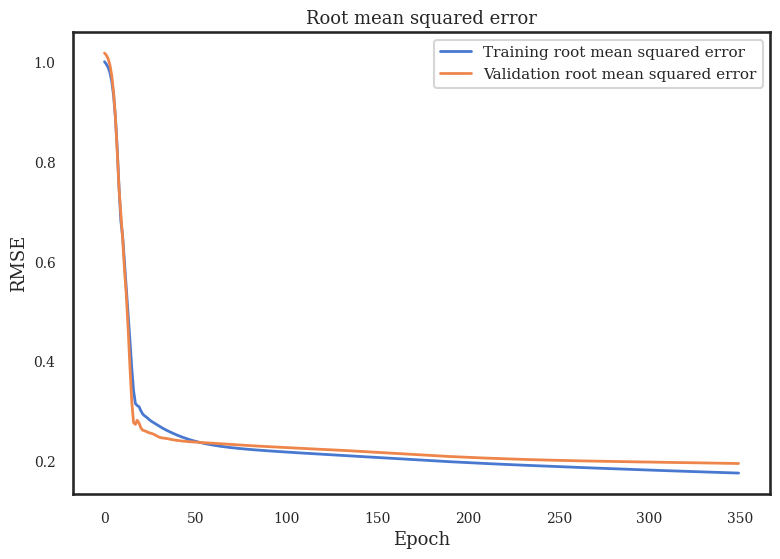

In [ ]:
plot_metric(pd.read_csv('results/Karimama/LSTM_train_output.csv')[:EPOCHS])
plt.savefig(os.path.join('results/Karimama/', 'LSTM_train_val_rmse.png'))
plt.show()

In [ ]:
# 350 epochs to be taken into consideration

### GRU

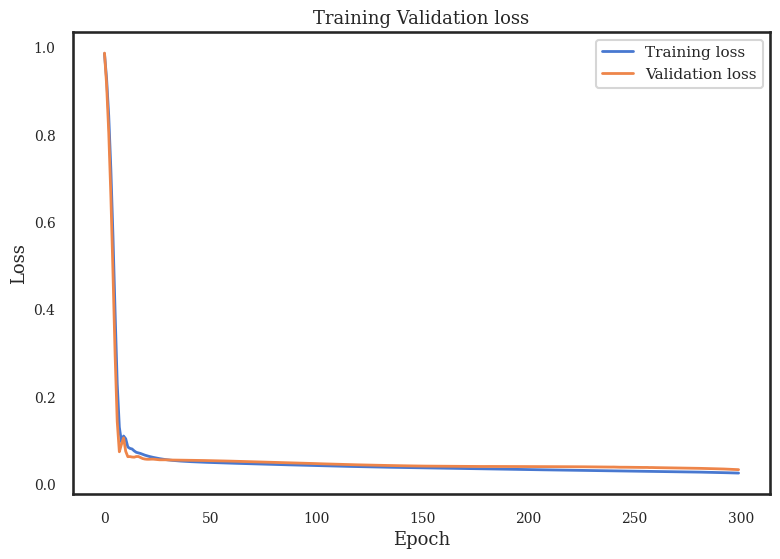

In [ ]:
EPOCHS = 300
plot_loss(pd.read_csv('results/Karimama/GRU_train_output.csv')[:EPOCHS])
plt.savefig(os.path.join('results/Karimama/', 'GRU_train_val_loss.png'))
plt.show()

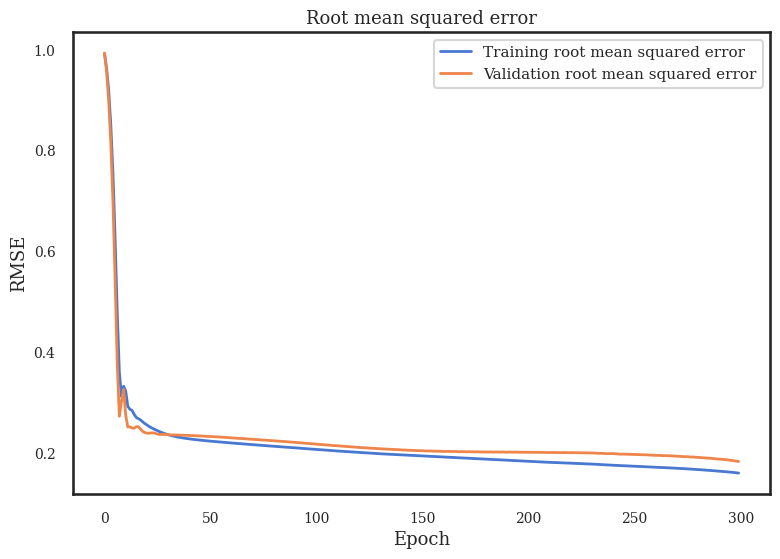

In [ ]:
plot_metric(pd.read_csv('results/Karimama/GRU_train_output.csv')[:EPOCHS])
plt.savefig(os.path.join('results/Karimama/', 'GRU_train_val_rmse.png'))
plt.show()

In [ ]:
# 300 epochs to be taken into consideration

### conv1D-LSTM

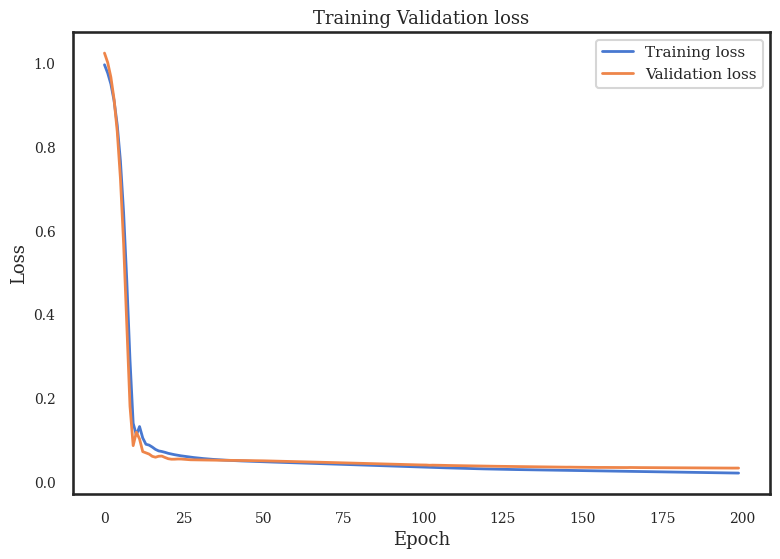

In [ ]:
EPOCHS = 200
plot_loss(pd.read_csv('results/Karimama/conv1D_lstm_train_output.csv')[:EPOCHS])
plt.savefig(os.path.join('results/Karimama/', 'conv1D_LSTM_train_val_loss.png'))
plt.show()

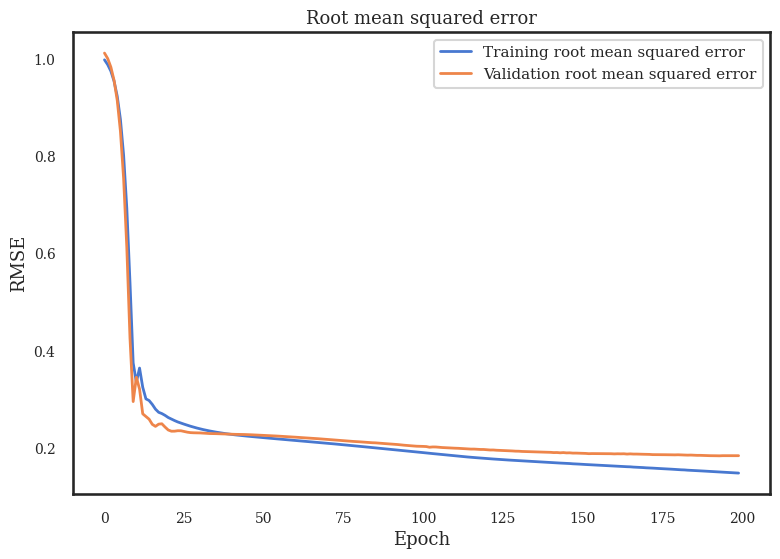

In [ ]:
plot_metric(pd.read_csv('results/Karimama/conv1D_lstm_train_output.csv')[:EPOCHS])
plt.savefig(os.path.join('results/Karimama/', 'conv1D_LSTM_train_val_rmse.png'))
plt.show()

In [ ]:
# 200 epochs to be taken into consideration

## Kandi

### conv1D

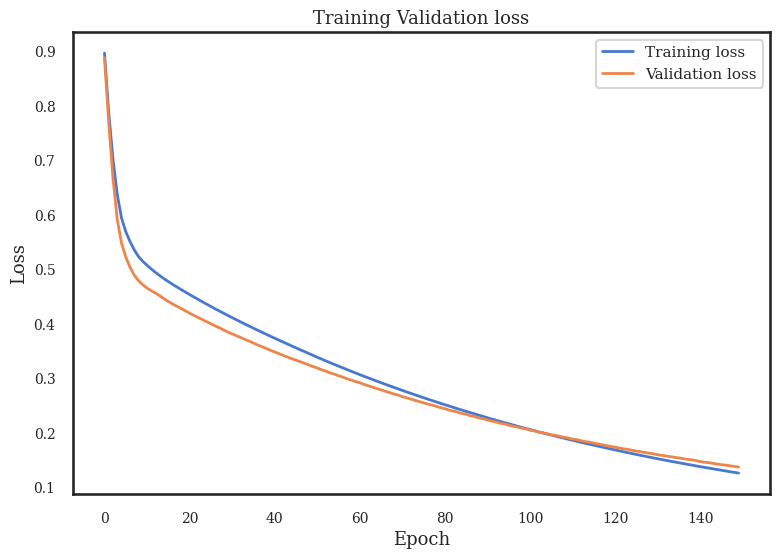

In [ ]:
EPOCHS = 150
plot_loss(pd.read_csv('results/Kandi/conv1D_train_output.csv')[:EPOCHS])
plt.savefig(os.path.join('results/Kandi/', 'conv1D_train_val_loss.png'))
plt.show()

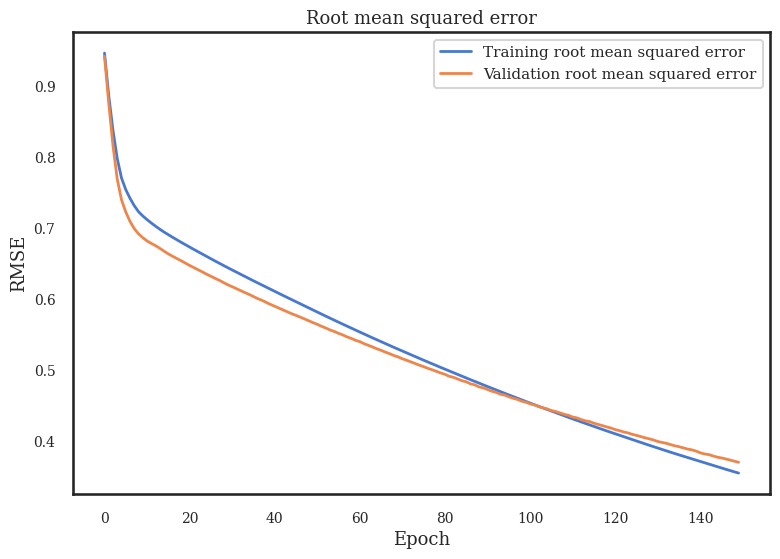

In [ ]:
plot_metric(pd.read_csv('results/Kandi/conv1D_train_output.csv')[:EPOCHS])
plt.savefig(os.path.join('results/Kandi/', 'conv1D_train_val_rmse.png'))
plt.show()

In [ ]:
# 150 epochs to be taken into consideration

### LSTM

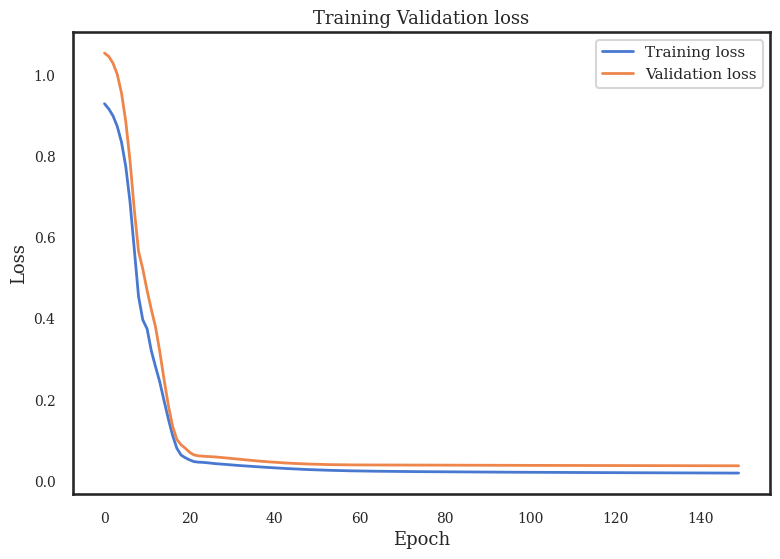

In [ ]:
plot_loss(pd.read_csv('results/Kandi/LSTM_train_output.csv')[:EPOCHS])
plt.savefig(os.path.join('results/Kandi/', 'LSTM_train_val_loss.png'))
plt.show()

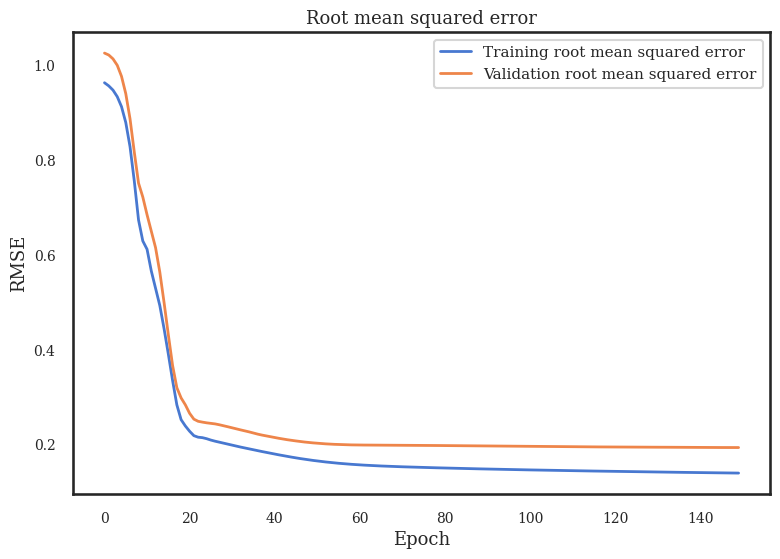

In [ ]:
plot_metric(pd.read_csv('results/Kandi/LSTM_train_output.csv')[:EPOCHS])
plt.savefig(os.path.join('results/Kandi/', 'LSTM_train_val_rmse.png'))
plt.show()

In [ ]:
# 150 epochs to be taken into consideration

### GRU

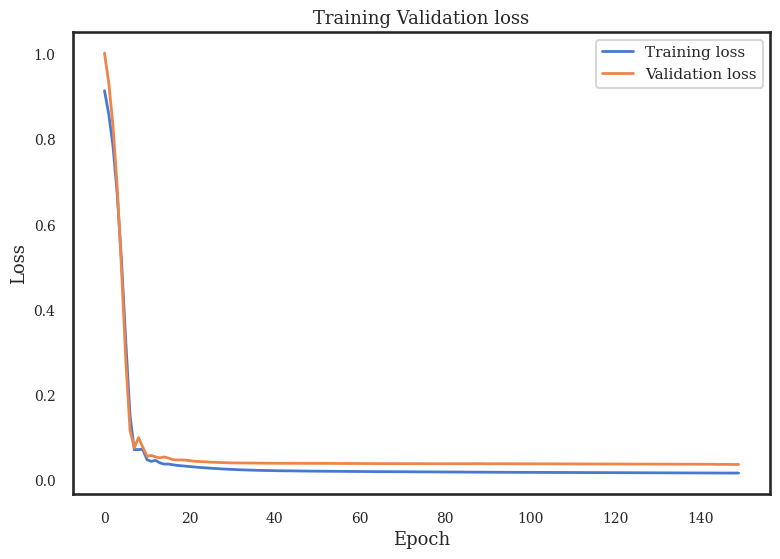

In [ ]:
plot_loss(pd.read_csv('results/Kandi/GRU_train_output.csv')[:EPOCHS])
plt.savefig(os.path.join('results/Kandi/', 'GRU_train_val_loss.png'))
plt.show()

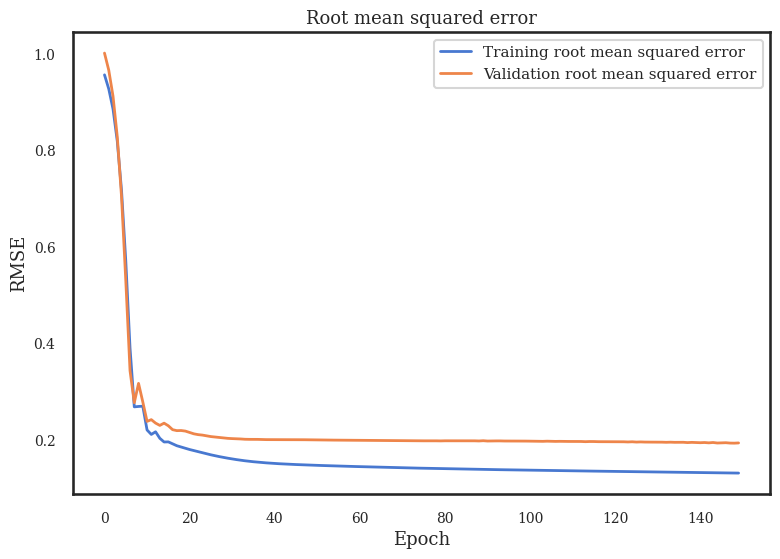

In [ ]:
plot_metric(pd.read_csv('results/Kandi/GRU_train_output.csv')[:EPOCHS])
plt.savefig(os.path.join('results/Kandi/', 'GRU_train_val_rmse.png'))
plt.show()

In [ ]:
# 150 epochs to be taken into consideration

### conv1D-LSTM

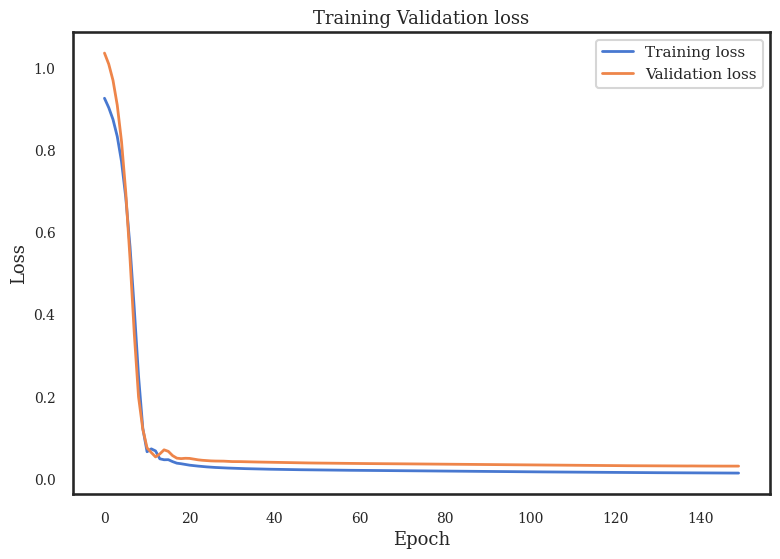

In [ ]:
plot_loss(pd.read_csv('results/Kandi/conv1D_lstm_train_output.csv')[:EPOCHS])
plt.savefig(os.path.join('results/Kandi/', 'conv1D_LSTM_train_val_loss.png'))
plt.show()

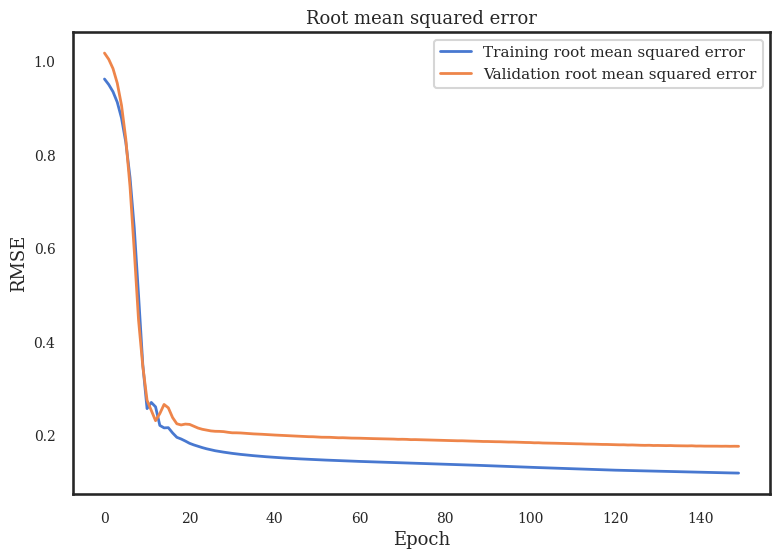

In [ ]:
plot_metric(pd.read_csv('results/Kandi/conv1D_lstm_train_output.csv')[:EPOCHS])
plt.savefig(os.path.join('results/Kandi/', 'conv1D_LSTM_train_val_rmse.png'))
plt.show()

In [ ]:
# 150 epochs to be taken into consideration

## Gogounou

### conv1D

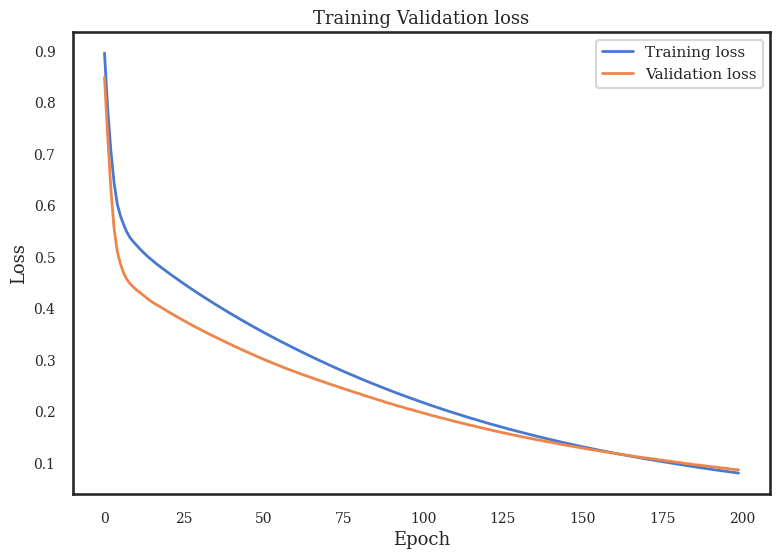

In [ ]:
EPOCHS = 200
data = pd.read_csv('results/Gogounou/conv1D_train_output.csv')
plot_loss(data[:EPOCHS])
plt.savefig(os.path.join('results/Gogounou/', 'conv1D_train_val_loss.png'))
plt.show()

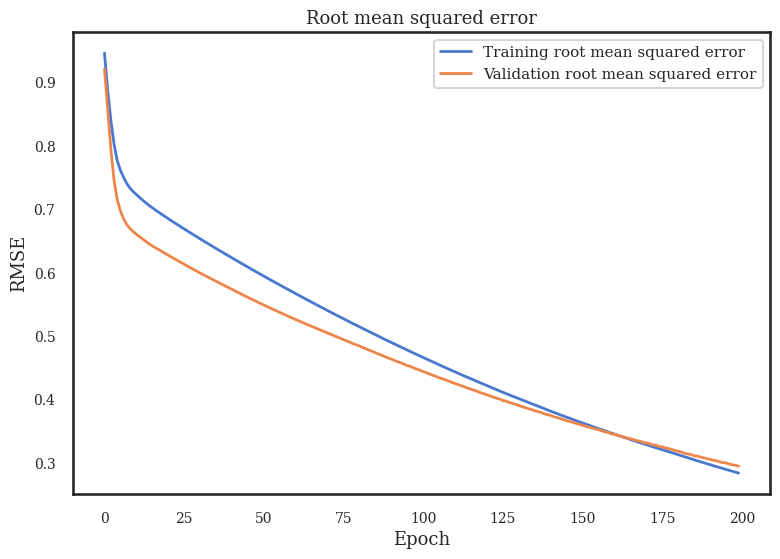

In [ ]:
plot_metric(data[:EPOCHS])
plt.savefig(os.path.join('results/Gogounou/', 'conv1D_train_val_rmse.png'))
plt.show()

In [ ]:
# 200 epochs to be taken into consideration

### LSTM

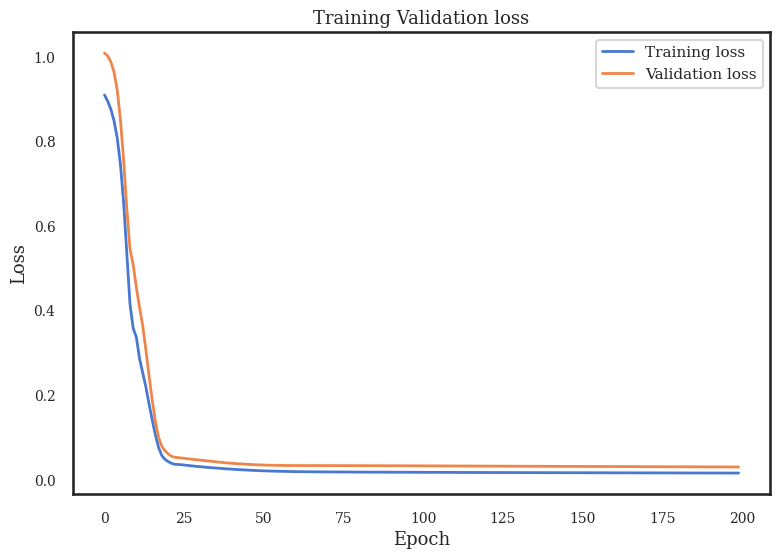

In [ ]:
data = pd.read_csv('results/Gogounou/LSTM_train_output.csv')
plot_loss(data[:EPOCHS])
plt.savefig(os.path.join('results/Gogounou/', 'LSTM_train_val_loss.png'))
plt.show()

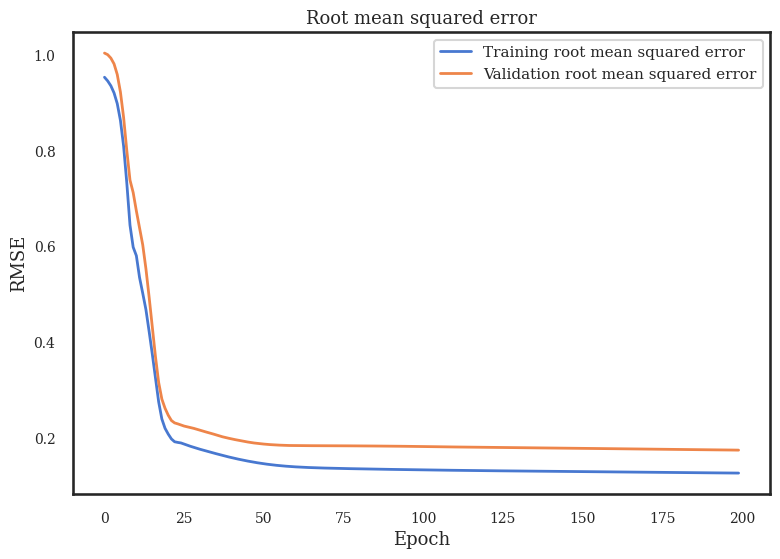

In [ ]:
plot_metric(data[:EPOCHS])
plt.savefig(os.path.join('results/Gogounou/', 'LSTM_train_val_rmse.png'))
plt.show()

In [ ]:
# 200 epochs to be taken into consideration

### GRU

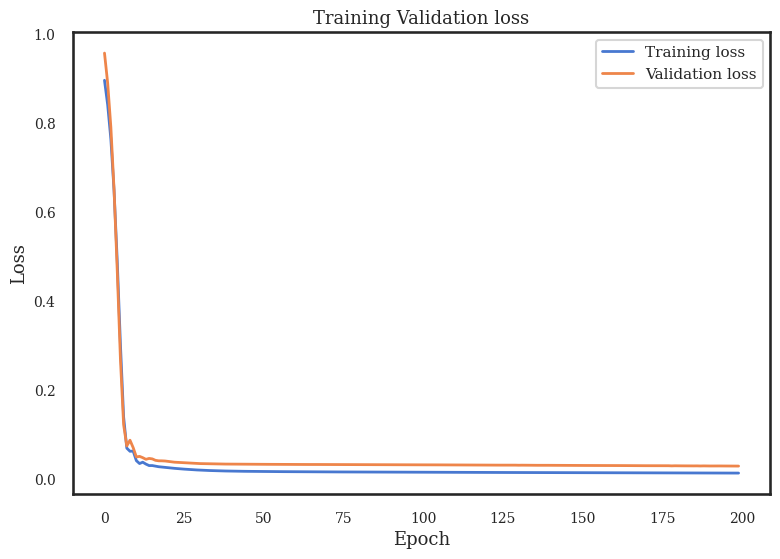

In [ ]:
data = pd.read_csv('results/Gogounou/GRU_train_output.csv')
plot_loss(data[:EPOCHS])
plt.savefig(os.path.join('results/Gogounou/', 'GRU_train_val_loss.png'))
plt.show()

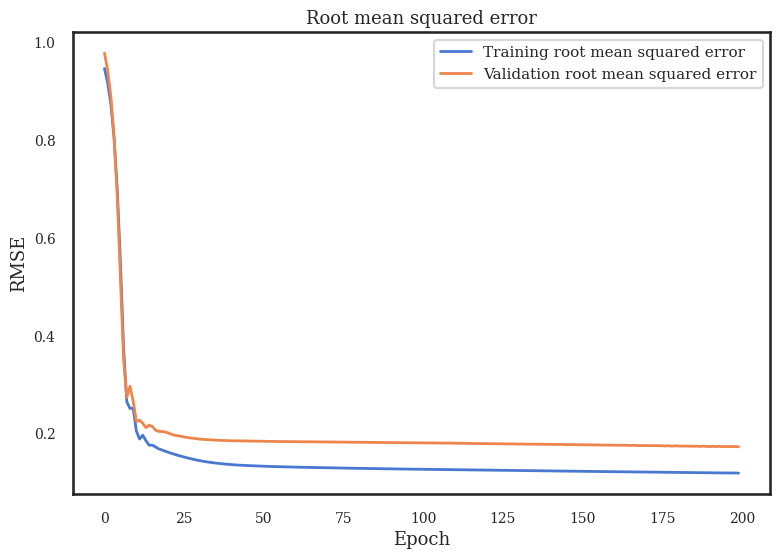

In [ ]:
plot_metric(data[:EPOCHS])
plt.savefig(os.path.join('results/Gogounou/', 'GRU_train_val_rmse.png'))
plt.show()

In [ ]:
# 200 epochs to be taken into consideration

### conv1D-LSTM

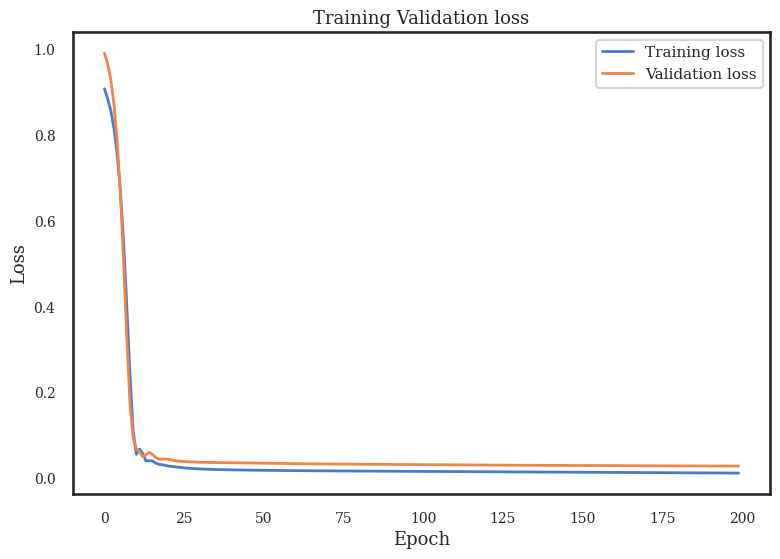

In [ ]:
data = pd.read_csv('results/Gogounou/conv1D_lstm_train_output.csv')
plot_loss(data[:EPOCHS])
plt.savefig(os.path.join('results/Gogounou/', 'conv1D_lstm_train_val_loss.png'))
plt.show()

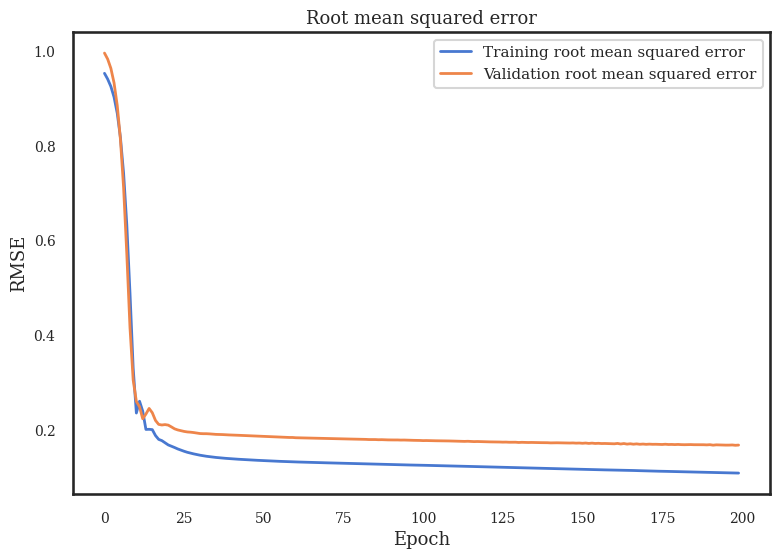

In [ ]:
plot_metric(data[:EPOCHS])
plt.savefig(os.path.join('results/Gogounou/', 'conv1D_lstm_train_val_rmse.png'))
plt.show()

In [ ]:
# 200 epochs to be taken into consideration

## Banikoara

### conv1D

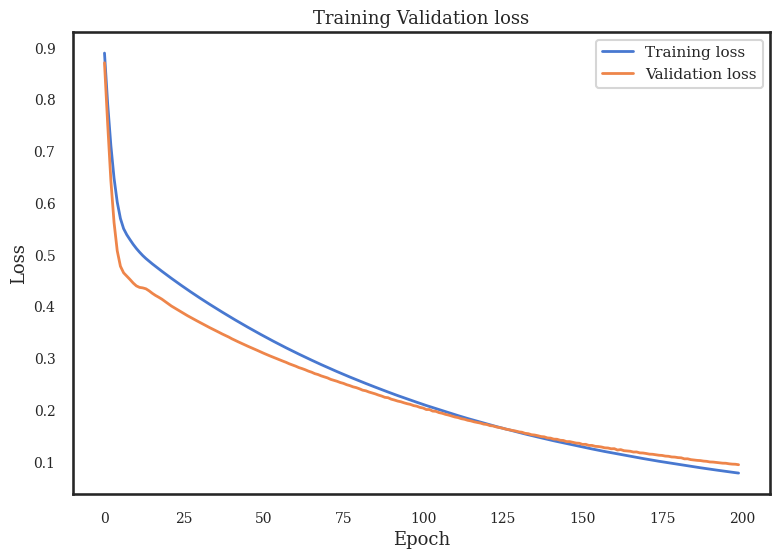

In [ ]:
EPOCHS = 200
data = pd.read_csv('results/Banikoara/conv1D_train_output.csv')
plot_loss(data[:EPOCHS])
plt.savefig(os.path.join('results/Banikoara/', 'conv1D_train_val_loss.png'))
plt.show()

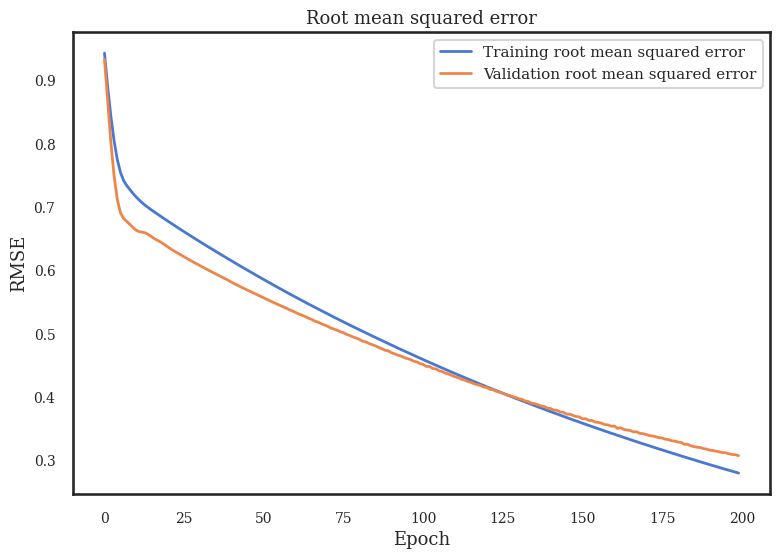

In [ ]:
plot_metric(data[:EPOCHS])
plt.savefig(os.path.join('results/Banikoara/', 'conv1D_train_val_rmse.png'))
plt.show()

In [ ]:
# 200 epochs to be taken into consideration

### LSTM

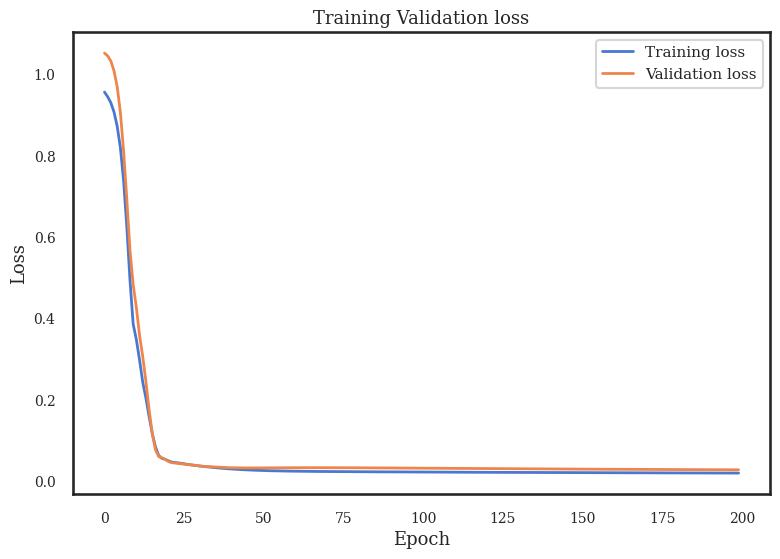

In [ ]:
data = pd.read_csv('results/Banikoara/LSTM_train_output.csv')
plot_loss(data[:EPOCHS])
plt.savefig(os.path.join('results/Banikoara/', 'LSTM_train_val_loss.png'))
plt.show()

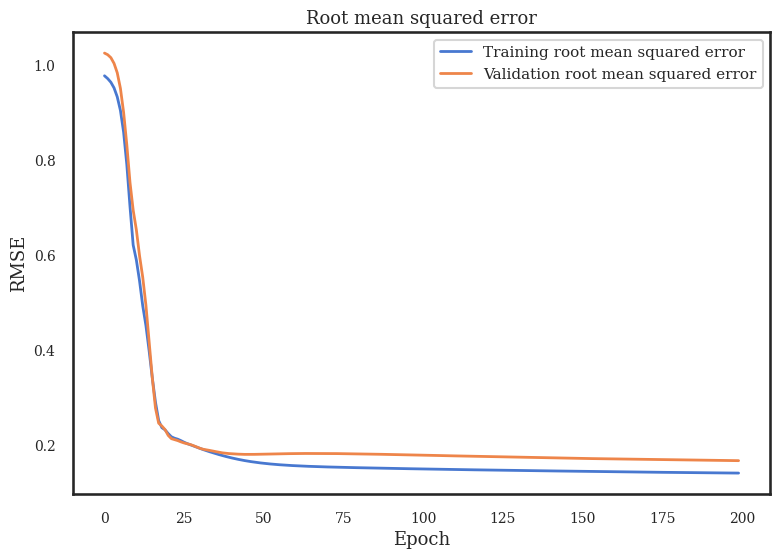

In [ ]:
plot_metric(data[:EPOCHS])
plt.savefig(os.path.join('results/Banikoara/', 'LSTM_train_val_rmse.png'))
plt.show()

In [ ]:
# 200 epochs to be taken into consideration

### GRU

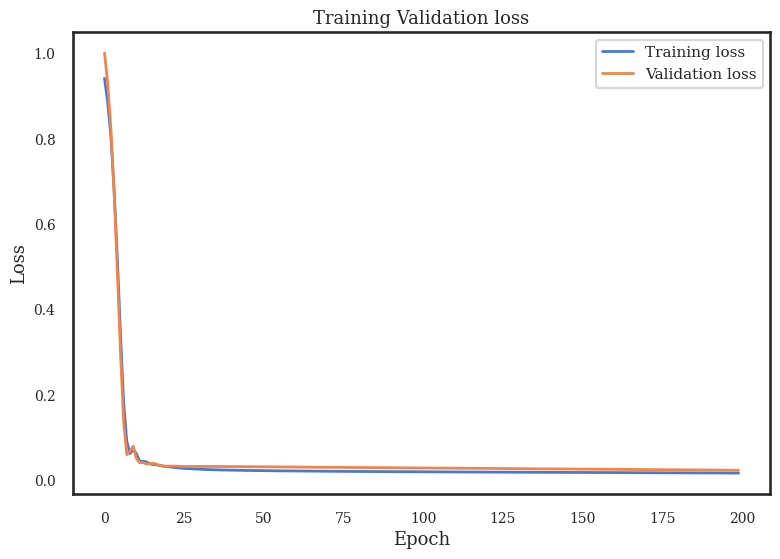

In [ ]:
data = pd.read_csv('results/Banikoara/GRU_train_output.csv')
plot_loss(data[:EPOCHS])
plt.savefig(os.path.join('results/Banikoara/', 'GRU_train_val_loss.png'))
plt.show()

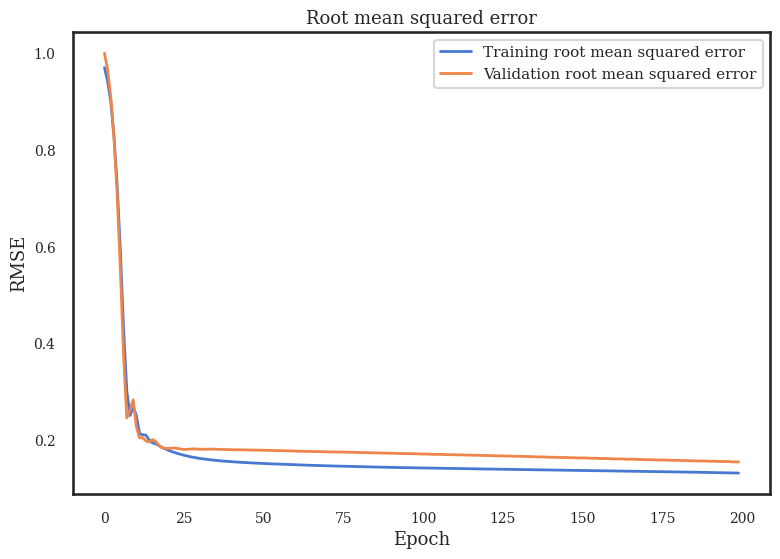

In [ ]:
plot_metric(data[:EPOCHS])
plt.savefig(os.path.join('results/Banikoara/', 'GRU_train_val_rmse.png'))
plt.show()

In [ ]:
# 200 epochs to be taken into consideration

### conv1D-LSTM

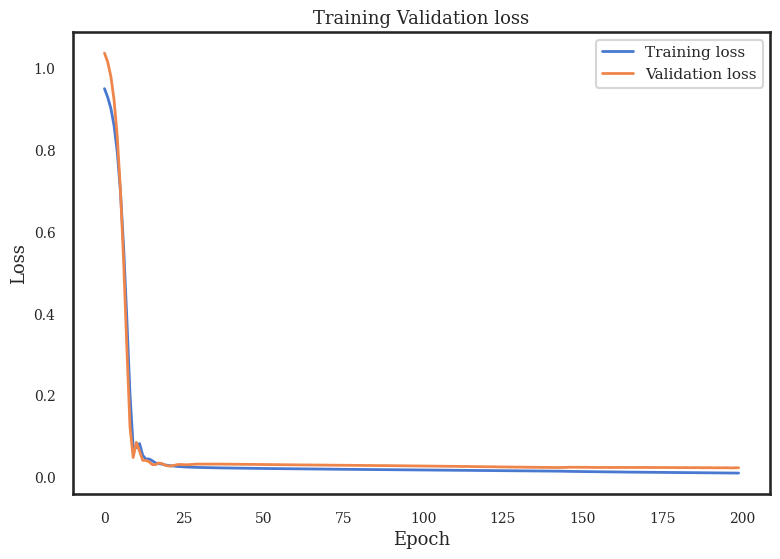

In [ ]:
data = pd.read_csv('results/Banikoara/conv1D_lstm_train_output.csv')
plot_loss(data[:EPOCHS])
plt.savefig(os.path.join('results/Banikoara/', 'conv1D_lstm_train_val_loss.png'))
plt.show()

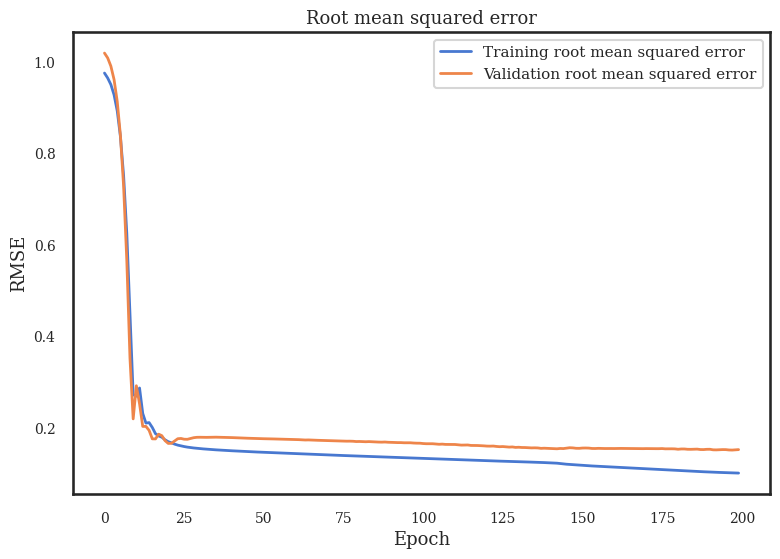

In [ ]:
plot_metric(data[:EPOCHS])
plt.savefig(os.path.join('results/Banikoara/', 'conv1D_lstm_train_val_rmse.png'))
plt.show()

In [ ]:
# 200 epochs to be taken into consideration

## Segbana

### conv1D

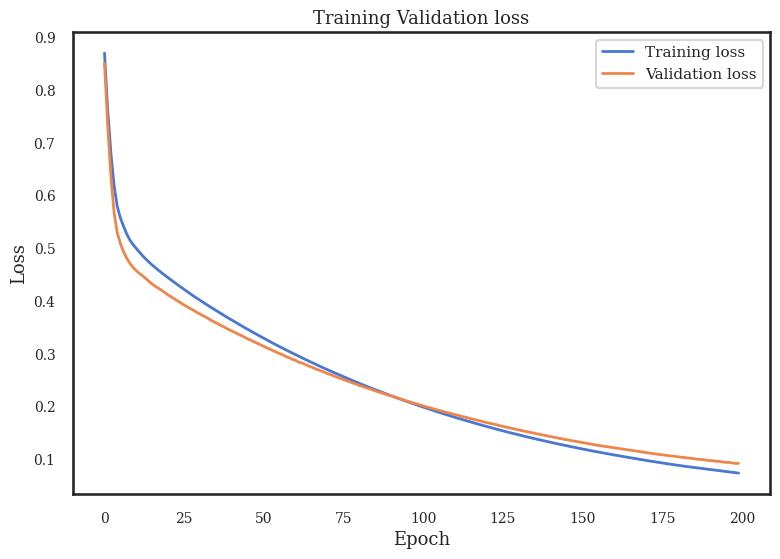

In [ ]:
model_output = pd.read_csv('results/Segbana/conv1D_train_output.csv')

plot_loss(model_output[:200])
plt.savefig(os.path.join('results/Segbana/', 'conv1D_train_val_loss.png'))
plt.show()

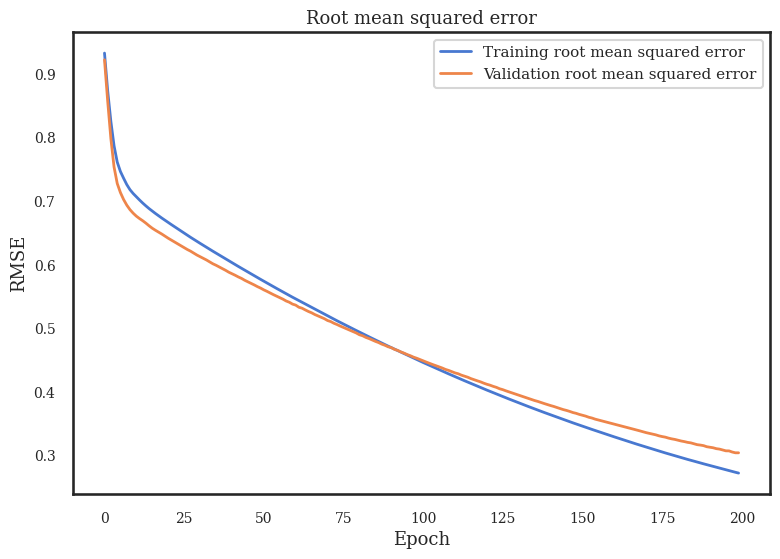

In [ ]:
plot_metric(model_output[:200])
plt.savefig(os.path.join('results/Segbana/', 'conv1D_train_val_rmse.png'))
plt.show()

### LSTM

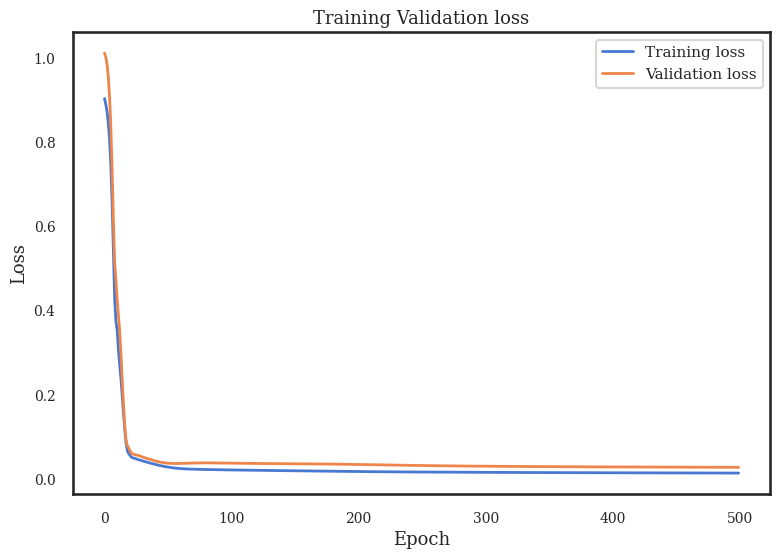

In [ ]:
model_output = pd.read_csv('results/Segbana/LSTM_train_output.csv')

plot_loss(model_output[:500])
plt.savefig(os.path.join('results/Segbana/', 'LSTM_train_val_loss.png'))
plt.show()

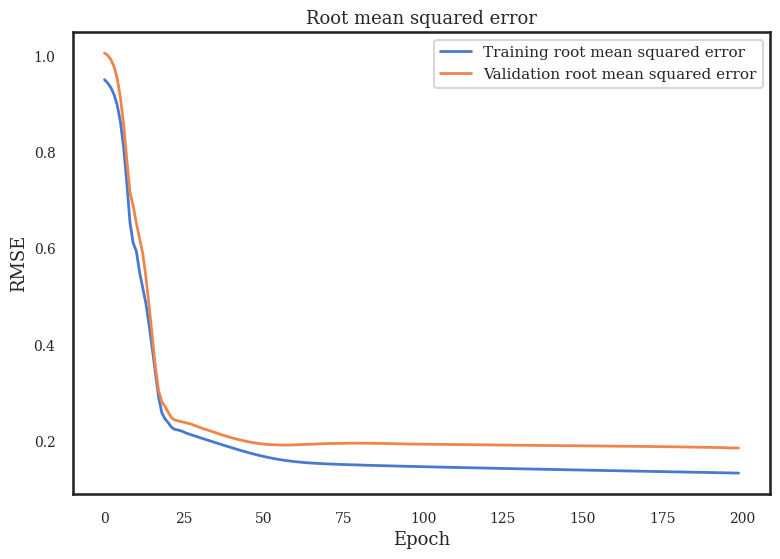

In [ ]:
plot_metric(model_output[:EPOCHS])
plt.savefig(os.path.join('results/Segbana/', 'LSTM_train_val_rmse.png'))
plt.show()

### GRU

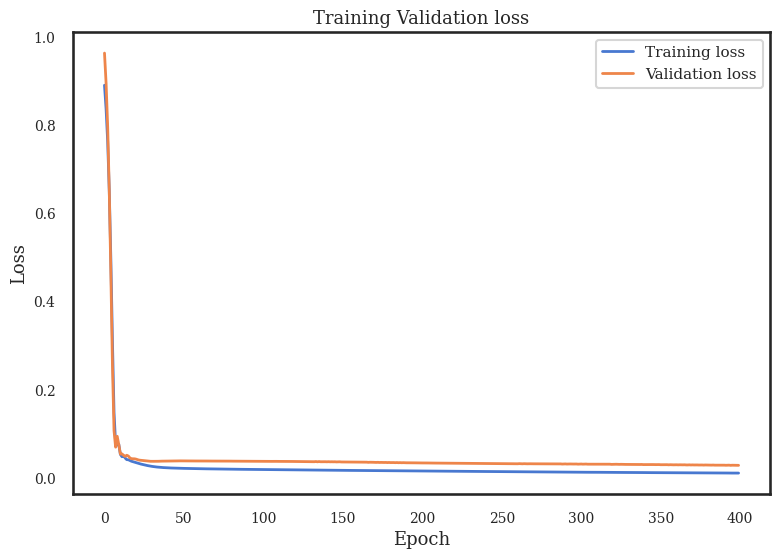

In [ ]:
EPOCHS = 400
model_output = pd.read_csv('results/Segbana/GRU_train_output.csv')

plot_loss(model_output[:EPOCHS])
plt.savefig(os.path.join('results/Segbana/', 'GRU_train_val_loss.png'))
plt.show()

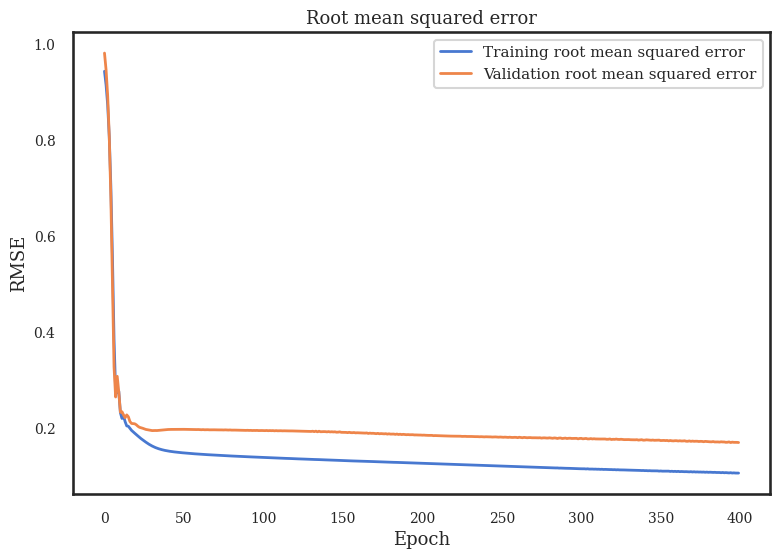

In [ ]:
plot_metric(model_output[:EPOCHS])
plt.savefig(os.path.join('results/Segbana/', 'GRU_train_val_rmse.png'))
plt.show()

### conv1D-LSTM

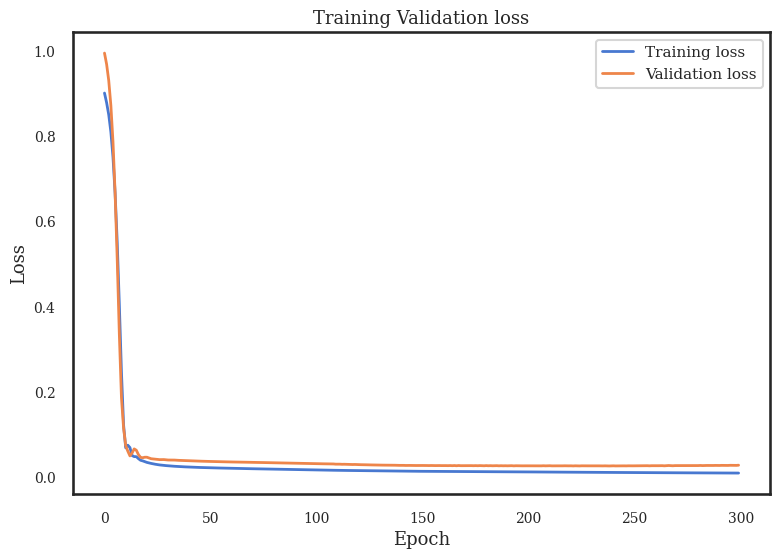

In [ ]:
model_output = pd.read_csv('results/Segbana/conv1D_lstm_train_output.csv')

plot_loss(model_output[:300])
plt.savefig(os.path.join('results/Segbana/', 'conv1D_lstm_train_val_loss.png'))
plt.show()

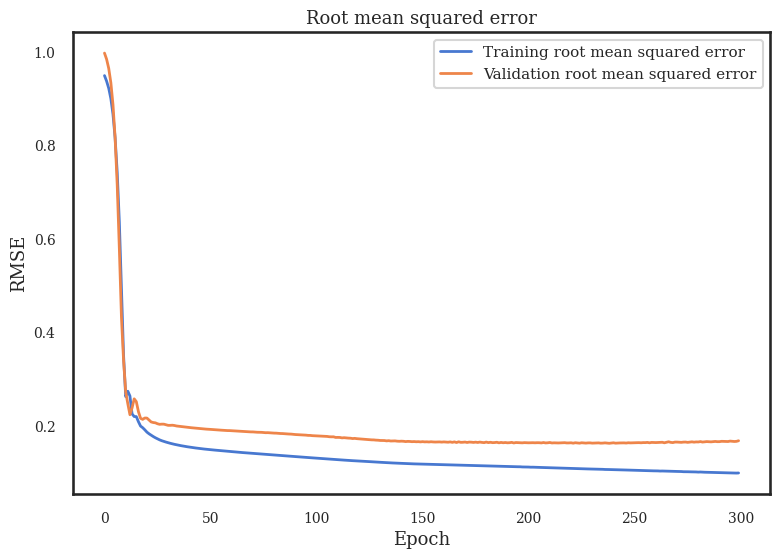

In [ ]:
plot_metric(model_output[:300])
plt.savefig(os.path.join('results/Segbana/', 'conv1D_lstm_train_val_rmse.png'))
plt.show()

In [ ]:
from google.colab import drive
drive.mount('/content/drive')